In [2]:
import os, sys
sys.path.append(r'libraries')
import LOTlib3
import numpy as np
from IPython.display import Image
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

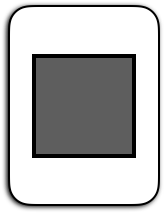

In [22]:
img_folder = '../experiment/static/images/'
stims = ['stim00.png',
        'stim01.png',
        'stim02.png',
        'stim03.png',
        'stim04.png',
        'stim05.png',
        'stim06.png',
        'stim07.png'
        ]
Image(filename= img_folder+stims[0]) 

In [29]:
# Problem types
def typeI(stim):
    return stim % 2
def typeII(stim):
    labels = [0,1,1,0,0,1,1,0]
    return(labels[stim])
def typeIII(stim):
    labels = [1,0,1,0,1,1,0,0]
    return(labels[stim])
def typeIV(stim):
    labels = [1,1,1,0,1,0,0,0]
    return(labels[stim])
def typeV(stim):
    labels = [1,0,1,0,1,0,0,1]
    return(labels[stim])
def typeVI(stim):
    labels = [1,0,0,1,0,1,1,0]
    return(labels[stim])

catfuns = [typeI, typeII, typeIII, typeIV, typeV, typeVI]

In [25]:

# SHJ counterbalancing tools as written in javascript by crump/mcdonnell/gureckis and translated to python by me pam

# // We want to be able to alias the order of stimuli to a single number which
# // can be stored and which can easily replicate a given stimulus order.
# /* Extra details: arr is 3 digits which together would be the binary version of decimal number 0 thru 7.
#    E.g., arr = [0,1,0] is binary for decimal 2.
#    Ordernum is either 0 or 1. 
# */
def changeorder(arr, ordernum):
    thisorder = ordernum
    shufflelocations = []
    
    for i in range(len(arr)):
        shufflelocations.append(i); # Now shufflelocations = [0,1,2]
    
    for i in reversed(range(len(arr))): # i=2,1,0
        loci = shufflelocations[i]
        locj = shufflelocations[int(thisorder%(i+1))] # [0, 1] modulo [3, 2, 1]
        # Note that 0 mod anything is 0
        # whereas 1%3=1, 1%2=1, 1%1=0
        thisorder = np.floor(thisorder/(i+1)) # for i=2,1,0 then thisorder=0,0,1 for ordernum=1, and 0,0,0 otherwise
        tempi = arr[loci]
        tempj = arr[locj]
        arr[loci] = tempj
        arr[locj] = tempi
    
    return arr

# // Stimulus counterbalancer
def getstim(theorystim,condition):
    assert theorystim < 8, "Stim >=8 ("+theorystim+")"
    assert theorystim >= 0, "Stim less than 0 ("+theorystim+")"
    flippedstim = theorystim^condition['dimvals'] # Here the stim identities are flipped
#         /* Detail on the above line: ^ is bitwise XOR operator. 
#         / dimvals is also between 0 and 7, and theorystim is between 0 and 7 inclusive. 
#         / When dimvals is 0, flippedstim will be the same decimal number as theorystim.
#         / When dimvals is 1, flippedstim will swap 0 with 1 and vice versa, 
#         / 2 with 3 and vice versa,
#         / 4 with 5 et,
#         / 6 with 7. 
#         / So we have these groups [0,1] [2,3] [4,5] [6,7] where flippedstim will be the 
#         / partner of the original value of theorystim IF dimvals is 1. 
#         */
    assert flippedstim <8, "Agh"  # This shouldnt happen
    bits = []
    for i in range(3):
        if flippedstim&(2**i): # if this is nonzero
            bits.append(1)
        else:
            bits.append(0)
#         /* Ampersand & is bitwise AND operator.
#             note: flippedstim is between 0 and 7 inclusive
#             note: Math.pow(2,i) == 2**i and 0<i<3 so the expression has possible decimal values 1,2,4 (in binary, 1, 10, 100)
#             x & 1 returns 1 for odd numbers x=[1,3,5,7] else 0
#             x & 2 returns 2 for x=[2,3,6,7] else 0
#             x & 4 returns 4 for x=[4,5,6,7] else 0
#             The ? 1:0 portion just means change any "1,2,4" result to simply 1, else 0 
#            SO, bits contains the category (0 or 1) of the stimulus under these three rules (right?)
#             e.g., for 
#             x=0 bits=[0,0,0]; x=1 bits=[1,0,0]
#             x=2 bits=[0,1,0]; x=3 bits=[1,1,0]
#             x=4 bits=[0,0,1]; x=5 bits=[1,0,1]
#             x=6 bits=[0,1,1]; x=7 bits=[1,1,1]
#         */

    newbits = changeorder(bits, condition['dimorder']) # in javascript, no new var here bc function works in-place

    multiples = [1, 2, 4]
    ret = 0
    for i in range(3):
        ret += multiples[i] * newbits[i]; # Here we convert from binary [bits] to decimal
    
    return ret

[0, 1, 2, 3, 4, 5, 6, 7]
['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
['stim00.png', 'stim04.png', 'stim01.png', 'stim05.png', 'stim02.png', 'stim06.png', 'stim03.png', 'stim07.png']


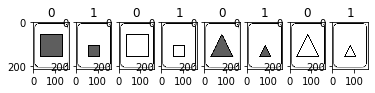

In [76]:

# actual params
condition = {}
condition['rule'] = 0
condition['dimvals'] = 0
condition['dimorder'] = 0
condition['nRepeats'] = 1

# # check that params follow rules
# assert condition['dimvals'] in [0,1,2,3,4,5,6,7], "dimvals should be int between 0 and 8"
# assert condition['dimorder'] in [0,1,2,3,4,5], "dimorder should be int between 0 and 6"
# assert condition['rule'] in [0,1,2,3,4,5], "rule should be an int between 0 and 5 for the six SHJ problem types"

catfun = catfuns[condition['rule']];
shapes = ['square','triangle']
colors = ['black','white']
sizes = ['small','large']

allstims = [0,1,2,3,4,5,6,7]

testcardsleft = allstims*condition['nRepeats']
# random.seed(17)
# random.shuffle(testcardsleft)
print(testcardsleft)
groupBool = [catfun(a) for a in range(8)]
groupLabel=[]
for ii in groupBool:
    if groupBool[ii]:
        groupLabel.append("B")
    else:
        groupLabel.append("A")
print(groupLabel)

stimcardspresented = []

for ii in range(len(testcardsleft)):
    prescard = testcardsleft[ii]
    stim = stims[getstim(prescard,condition)]
    stimcardspresented.append(stim)
    img = mpimg.imread(img_folder+stim)
    plt.subplot(1,8,ii+1,title=catfun(prescard))
    plt.imshow(img)  
#     plt.show()
#     time.sleep(2)

print(stimcardspresented)

In [3]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Data
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

from LOTlib3.DataAndObjects import FunctionData, Obj

def make_data(n=1, alpha=0.999):
    return [FunctionData(input=[Obj(shape='square', color='black', size='small')], output=True, alpha=alpha),
            FunctionData(input=[Obj(shape='square', color='white', size='small')], output=False, alpha=alpha),
            FunctionData(input=[Obj(shape='triangle', color='white', size='small')], output=True, alpha=alpha),
            FunctionData(input=[Obj(shape='triangle', color='black', size='small')], output=True, alpha=alpha),
            FunctionData(input=[Obj(shape='square', color='black', size='large')], output=False, alpha=alpha),
            FunctionData(input=[Obj(shape='square', color='white', size='large')], output=True, alpha=alpha),
            FunctionData(input=[Obj(shape='triangle', color='white', size='large')], output=False, alpha=alpha),
            FunctionData(input=[Obj(shape='triangle', color='black', size='large')], output=False, alpha=alpha)]*n

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Grammar
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

from LOTlib3.DefaultGrammars import DNF
from LOTlib3.Miscellaneous import q, random

# DNF defaultly includes the logical connectives so we need to add predicates to it.
grammar = DNF

# Two predicates for checking x's color and shape
# Note: per style, functions in the LOT end in _
grammar.add_rule('PREDICATE', 'is_color_', ['x', 'COLOR'], 1.0)
grammar.add_rule('PREDICATE', 'is_shape_', ['x', 'SHAPE'], 1.0)
grammar.add_rule('PREDICATE', 'is_size_', ['x', 'SIZE'], 1.0)


# Some colors/shapes each (for this simple demo)
# These are written in quotes so they can be evaled
grammar.add_rule('COLOR', q('black'), None, 1.0)
grammar.add_rule('COLOR', q('white'), None, 1.0)

grammar.add_rule('SHAPE', q('square'), None, 1.0)
grammar.add_rule('SHAPE', q('triangle'), None, 1.0)

grammar.add_rule('SIZE', q('small'), None, 1.0)
grammar.add_rule('SIZE', q('large'), None, 1.0)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Hypothesis
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

from LOTlib3.Hypotheses.LOTHypothesis import LOTHypothesis
from LOTlib3.Hypotheses.Priors.RationalRules import RationaRulesPrior
from LOTlib3.Hypotheses.Likelihoods.BinaryLikelihood import BinaryLikelihood


# from LOTlib3.Hypotheses.Proposers.RegenerationProposer import RegenerationProposer
# from LOTlib3.Hypotheses.Proposers.Proposer import ProposalFailedException

class MyHypothesis(RationaRulesPrior, BinaryLikelihood, LOTHypothesis):
    def __init__(self, **kwargs):
        LOTHypothesis.__init__(self, grammar=grammar, **kwargs)
        self.rrAlpha=2.0

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Main
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

if __name__ == "__main__":
    from LOTlib3 import break_ctrlc
    from LOTlib3.Miscellaneous import qq
    from LOTlib3.TopN import TopN
    from LOTlib3.Samplers.MetropolisHastings import MetropolisHastingsSampler

    h0   = MyHypothesis()
    data = make_data()
    top  = TopN(N=10)
    thin = 100

    for i, h in enumerate(break_ctrlc(MetropolisHastingsSampler(h0, data))):

        top << h

        if i % thin == 0:
            print("#", i, h.posterior_score, h.prior, h.likelihood, qq(h))
        
        if i>1000 and abs(h.likelihood) < .01:
            break

for h in top:
    print(h.posterior_score, h.prior, h.likelihood, qq(h))

# 0 -31.791904699454946 -1.386294361119889 -30.405610338335055 "lambda x: False"
# 100 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 200 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 300 -20.867766149470203 -5.662960480135944 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 400 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
# 500 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 600 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 700 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 800 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
# 900 -20.867766149470203 -5.662960480135944 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
# 1000 -20.17461896

# 7900 -20.17461896891026 -4.969813299576 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 8000 -20.17461896891026 -4.969813299576 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 8100 -20.17461896891026 -4.969813299576 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 8200 -20.867766149470203 -5.662960480135944 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 8300 -20.17461896891026 -4.969813299576 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 8400 -20.17461896891026 -4.969813299576 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 8500 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 8600 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 8700 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
# 8800 -23.884117710226928 -8.67931204089267 -15.204805669334258 "lambda x: or_(not_(is_size_(x, 'large')), not_(is_color_(

# 13500 -24.626555179997982 -17.022151845164124 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(is_color_(x, 'white'), and_(not_(is_size_(x, 'small')), is_shape_(x, 'square'))))"
# 13600 -24.22109007188982 -16.61668673705596 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(is_color_(x, 'white'), and_(not_(is_shape_(x, 'triangle')), is_color_(x, 'white'))))"
# 13700 -23.93340799943804 -16.32900466460418 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(is_size_(x, 'large'), and_(is_shape_(x, 'square'), is_color_(x, 'white'))))"
# 13800 -23.93340799943804 -16.32900466460418 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(is_color_(x, 'white'), and_(is_shape_(x, 'square'), is_shape_(x, 'square'))))"
# 13900 -23.42258237567205 -15.81817904083819 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(not_(is_size_(x, 'small')), and_(not_(is_shape_(x, 'triangle')), not_(is_color_(x, 'black')))))"
# 14000 -24

# 18500 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
# 18600 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 18700 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
# 18800 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 18900 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 19000 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 19100 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
# 19200 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
# 19300 -20.17461896891026 -4.969813299576 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
# 19400 -20.867766149470203 -5.662960480135944 -15.204805669334258 "lambda

# 25600 -20.378059937948628 -12.77365660311477 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(is_shape_(x, 'square'), is_color_(x, 'white')))"
# 25700 -20.378059937948628 -12.77365660311477 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(is_shape_(x, 'square'), is_color_(x, 'white')))"
# 25800 -20.378059937948628 -12.77365660311477 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(is_shape_(x, 'square'), is_color_(x, 'white')))"
# 25900 -23.017117267563883 -15.412713932730025 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(not_(is_color_(x, 'black')), and_(not_(is_color_(x, 'black')), not_(is_shape_(x, 'triangle')))))"
# 26000 -26.977930437161465 -19.373527102327607 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(not_(is_color_(x, 'black')), and_(is_shape_(x, 'square'), and_(not_(is_shape_(x, 'triangle')), not_(is_shape_(x, 'triangle'))))))"
# 26100 -26.677825844711123 -19.073422509877265 -7.604403334833859 "la

# 32500 -27.52420700017143 -12.319401330837174 -15.204805669334258 "lambda x: and_(not_(is_shape_(x, 'square')), and_(not_(is_shape_(x, 'square')), is_size_(x, 'small')))"
# 32600 -26.83105981961149 -11.62625415027723 -15.204805669334258 "lambda x: and_(is_shape_(x, 'triangle'), and_(is_shape_(x, 'triangle'), is_size_(x, 'small')))"
# 32700 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 32800 -20.867766149470203 -5.662960480135944 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
# 32900 -20.17461896891026 -4.969813299576 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
# 33000 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 33100 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 33200 -20.867766149470203 -5.662960480135944 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 33300 -19.076006680242145 -3.871201010907889 -15.204805

# 40300 -20.17461896891026 -4.969813299576 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 40400 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 40500 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 40600 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
# 40700 -20.17461896891026 -4.969813299576 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 40800 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 40900 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 41000 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 41100 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
# 41200 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: not_(is_size_(x, '

# 48200 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
# 48300 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 48400 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 48500 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
# 48600 -24.646257762273823 -9.441452092939567 -15.204805669334256 "lambda x: and_(is_size_(x, 'small'), not_(is_color_(x, 'white')))"
# 48700 -24.24079265416566 -9.035986984831403 -15.204805669334256 "lambda x: and_(is_color_(x, 'black'), is_size_(x, 'small'))"
# 48800 -20.867766149470203 -5.662960480135944 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 48900 -20.17461896891026 -4.969813299576 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 49000 -20.378059937948628 -12.77365660311477 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(is_shape_(x, 'square'

# 52900 -26.977930437161465 -19.373527102327607 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(is_color_(x, 'white'), and_(not_(is_shape_(x, 'triangle')), and_(is_size_(x, 'large'), is_size_(x, 'large')))))"
# 53000 -26.677825844711123 -19.073422509877265 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(not_(is_color_(x, 'black')), and_(not_(is_shape_(x, 'triangle')), and_(not_(is_shape_(x, 'triangle')), not_(is_color_(x, 'black'))))))"
# 53100 -26.677825844711123 -19.073422509877265 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(not_(is_color_(x, 'black')), and_(not_(is_shape_(x, 'triangle')), and_(not_(is_color_(x, 'black')), not_(is_shape_(x, 'triangle'))))))"
# 53200 -27.594116576585282 -19.989713241751424 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(not_(is_size_(x, 'small')), and_(is_shape_(x, 'square'), and_(not_(is_color_(x, 'black')), not_(is_shape_(x, 'triangle'))))))"
# 53300 -25.98467866415118 -18.38027532931732 -7.604

# 57100 -24.22109007188982 -16.61668673705596 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(not_(is_shape_(x, 'triangle')), and_(is_color_(x, 'white'), is_color_(x, 'white'))))"
# 57200 -24.626555179997986 -17.022151845164128 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(not_(is_shape_(x, 'triangle')), and_(is_shape_(x, 'square'), is_color_(x, 'white'))))"
# 57300 -26.28478325660152 -18.680379921767663 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(is_shape_(x, 'square'), and_(is_color_(x, 'white'), and_(is_size_(x, 'large'), is_size_(x, 'large')))))"
# 57400 -24.626555179997982 -17.022151845164124 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(is_shape_(x, 'square'), and_(is_color_(x, 'white'), not_(is_size_(x, 'small')))))"
# 57500 -27.488756060927457 -19.8843527260936 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(is_shape_(x, 'square'), and_(is_color_(x, 'white'), and_(not_(is_size

# 62900 -21.07120711850857 -13.466803783674713 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(not_(is_color_(x, 'black')), is_shape_(x, 'square')))"
# 63000 -21.07120711850857 -13.466803783674713 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(not_(is_color_(x, 'black')), is_shape_(x, 'square')))"
# 63100 -20.378059937948628 -12.77365660311477 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(not_(is_color_(x, 'black')), not_(is_shape_(x, 'triangle'))))"
# 63200 -23.93340799943804 -16.32900466460418 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(is_color_(x, 'white'), and_(not_(is_shape_(x, 'triangle')), is_color_(x, 'white'))))"
# 63300 -23.93340799943804 -16.32900466460418 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(is_color_(x, 'white'), and_(not_(is_shape_(x, 'triangle')), is_color_(x, 'white'))))"
# 63400 -24.338873107546206 -16.734469772712348 -7.604403334833859 "lambda x: or_(is_size_(x, 'smal

# 68400 -23.884117710226928 -8.67931204089267 -15.204805669334258 "lambda x: or_(not_(is_size_(x, 'large')), not_(is_color_(x, 'black')))"
# 68500 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 68600 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
# 68700 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
# 68800 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
# 68900 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
# 69000 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 69100 -20.17461896891026 -4.969813299576 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
# 69200 -19.076006680242145 -3.871201010907889 -15.204805669334258 "lambda x: is_size_(x, 'small')"
# 69300 -19.076006680242145 -3.8712

# 73800 -27.188651468477115 -19.584248133643257 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(is_color_(x, 'white'), and_(is_color_(x, 'white'), and_(is_size_(x, 'large'), not_(is_shape_(x, 'triangle'))))))"
# 73900 -24.22109007188982 -16.61668673705596 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(is_size_(x, 'large'), and_(not_(is_color_(x, 'black')), is_shape_(x, 'square'))))"
# 74000 -24.626555179997982 -17.022151845164124 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(is_shape_(x, 'square'), and_(not_(is_size_(x, 'small')), is_color_(x, 'white'))))"
# 74100 -23.42258237567205 -15.81817904083819 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(is_shape_(x, 'square'), and_(is_color_(x, 'white'), is_size_(x, 'large'))))"
# 74200 -23.42258237567205 -15.81817904083819 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(is_shape_(x, 'square'), and_(is_color_(x, 'white'), is_size_(x, 'large'))))"
# 74300 -

# 78000 -20.378059937948628 -12.77365660311477 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(not_(is_color_(x, 'black')), not_(is_shape_(x, 'triangle'))))"
# 78100 -21.07120711850857 -13.466803783674713 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(not_(is_color_(x, 'black')), not_(is_shape_(x, 'triangle'))))"
# 78200 -21.07120711850857 -13.466803783674713 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(is_color_(x, 'white'), not_(is_shape_(x, 'triangle'))))"
# 78300 -20.378059937948628 -12.77365660311477 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(is_color_(x, 'white'), is_shape_(x, 'square')))"
# 78400 -23.017117267563883 -15.412713932730025 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(is_color_(x, 'white'), and_(is_color_(x, 'white'), is_shape_(x, 'square'))))"
# 78500 -23.93340799943804 -16.32900466460418 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(not_(is_shape_(x, 'triangle')), and_

# 82300 -21.07120711850857 -13.466803783674713 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(is_shape_(x, 'square'), is_color_(x, 'white')))"
# 82400 -21.07120711850857 -13.466803783674713 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(is_shape_(x, 'square'), is_color_(x, 'white')))"
# 82500 -20.378059937948628 -12.77365660311477 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(is_shape_(x, 'square'), is_color_(x, 'white')))"
# 82600 -20.378059937948628 -12.77365660311477 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(is_shape_(x, 'square'), is_color_(x, 'white')))"
# 82700 -21.07120711850857 -13.466803783674713 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(not_(is_shape_(x, 'triangle')), is_color_(x, 'white')))"
# 82800 -20.378059937948628 -12.77365660311477 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(is_shape_(x, 'square'), is_color_(x, 'white')))"
# 82900 -20.378059937948628 -12.773656

# 86800 -21.07120711850857 -13.466803783674713 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(is_shape_(x, 'square'), not_(is_color_(x, 'black'))))"
# 86900 -20.378059937948628 -12.77365660311477 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(not_(is_shape_(x, 'triangle')), not_(is_color_(x, 'black'))))"
# 87000 -21.07120711850857 -13.466803783674713 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(not_(is_shape_(x, 'triangle')), is_color_(x, 'white')))"
# 87100 -21.07120711850857 -13.466803783674713 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(is_shape_(x, 'square'), is_color_(x, 'white')))"
# 87200 -20.378059937948628 -12.77365660311477 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(not_(is_shape_(x, 'triangle')), not_(is_color_(x, 'black'))))"
# 87300 -21.07120711850857 -13.466803783674713 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(not_(is_shape_(x, 'triangle')), is_

KeyboardInterrupt: 

In [4]:
for h in top:
        print(h.posterior_score, h.prior, h.likelihood, qq(h))

-20.867766149470203 -5.662960480135944 -15.204805669334258 "lambda x: is_size_(x, 'small')"
-20.867766149470203 -5.662960480135944 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
-20.378059937948628 -12.77365660311477 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(not_(is_shape_(x, 'triangle')), not_(is_color_(x, 'black'))))"
-20.378059937948628 -12.77365660311477 -7.604403334833859 "lambda x: or_(not_(is_size_(x, 'large')), and_(not_(is_color_(x, 'black')), not_(is_shape_(x, 'triangle'))))"
-20.378059937948628 -12.77365660311477 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(is_color_(x, 'white'), is_shape_(x, 'square')))"
-20.378059937948628 -12.77365660311477 -7.604403334833859 "lambda x: or_(is_size_(x, 'small'), and_(is_shape_(x, 'square'), is_color_(x, 'white')))"
-20.17461896891026 -4.969813299576 -15.204805669334258 "lambda x: not_(is_size_(x, 'large'))"
-20.17461896891026 -4.969813299576 -15.204805669334258 "lambda x: is_size_(x, 's